In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

k=KNeighborsClassifier()
d=DecisionTreeClassifier()
r=RandomForestClassifier()
l=LogisticRegression()
mb=MultinomialNB()
    
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("covid-19_vaccine_tweets_with_sentiment.csv",encoding="iso-8859-1")

In [3]:
df["tweet_text"]=df["tweet_text"].str.lower() 
df["tweet_text"]=df["tweet_text"].str.replace("[^\w\s]","") 
df["tweet_text"]=df["tweet_text"].str.replace("\d+","") 
df["tweet_text"]=df["tweet_text"].str.replace("\n","").replace("\r","") 

df.drop(columns=['tweet_id'], inplace=True)
df.drop(columns=['label'], inplace=True) 

df


,tweet_text
0,"4,000 a day dying from the so called covid-19 ..."
1,pranam message for today manifested in dhyan b...
2,hyderabad-based ?@bharatbiotech? has sought fu...
3,"confirmation that chinese #vaccines ""dont hav..."
4,"lab studies suggest #pfizer, #moderna vaccines..."
...,...
5995,@swamy39 dr. @swamy39 jee :many people like to...
5996,so happy to be fully vaccinated against covid-...
5997,serum institute of india announces cost of cov...
5998,@___batshitcrazy @barrowfordhead @bectully i h...


In [4]:
def sentiment_analysis(tweet):
    analysis = TextBlob(tweet)
    # Classer la polarité du tweet
    if analysis.sentiment.polarity > 0:
        return "positive"
    elif analysis.sentiment.polarity == 0:
        return "neutre"
    else:
        return "négative"
 
df['analyse_sentiment'] = df['tweet_text'].apply(sentiment_analysis)

df

,tweet_text,analyse_sentiment
0,"4,000 a day dying from the so called covid-19 ...",neutre
1,pranam message for today manifested in dhyan b...,positive
2,hyderabad-based ?@bharatbiotech? has sought fu...,positive
3,"confirmation that chinese #vaccines ""dont hav...",positive
4,"lab studies suggest #pfizer, #moderna vaccines...",neutre
...,...,...
5995,@swamy39 dr. @swamy39 jee :many people like to...,positive
5996,so happy to be fully vaccinated against covid-...,positive
5997,serum institute of india announces cost of cov...,neutre
5998,@___batshitcrazy @barrowfordhead @bectully i h...,positive


In [5]:
vect=CountVectorizer(lowercase=True,stop_words="english")
x=df.tweet_text
y=df.analyse_sentiment
x=vect.fit_transform(x)

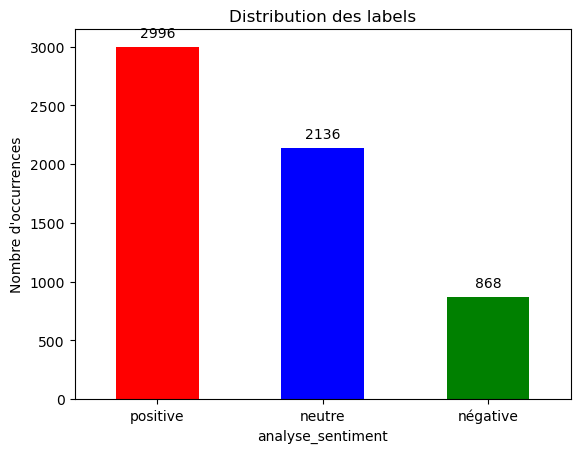

In [6]:
label_counts = df['analyse_sentiment'].value_counts()
ax = label_counts.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Distribution des labels')
plt.xlabel('analyse_sentiment')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=0)
 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

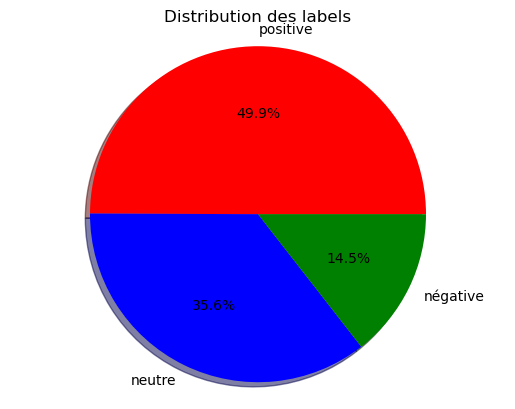

In [7]:
colors = ['red', 'blue', 'green']
labels = label_counts.index
explode = (0, 0, 0)  
plt.pie(label_counts, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.axis('equal')  
plt.title('Distribution des labels')
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_text         6000 non-null   object
 1   analyse_sentiment  6000 non-null   object
dtypes: object(2)
memory usage: 93.9+ KB


In [9]:
df["tweet_text"]=df["tweet_text"].str.lower() 
df["tweet_text"]=df["tweet_text"].str.replace("[^\w\s]","") 
df["tweet_text"]=df["tweet_text"].str.replace("\d+","")
df["tweet_text"]=df["tweet_text"].str.replace("\n","").replace("\r","") 
df_neutral=df[df['analyse_sentiment']==2]
df_positive=df[df['analyse_sentiment']==3]
df_negative=df[df['analyse_sentiment']==1]
df1=df[df['analyse_sentiment']!=2]


vect=CountVectorizer(lowercase=True,stop_words="english")
x=df.tweet_text
y=df.analyse_sentiment
x=vect.fit_transform(x)

In [10]:


tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
X = tfidf_vectorizer.fit_transform(df['tweet_text'])

 

# Séparation des données en ensembles d'entraînement et de test
y = df['analyse_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

 

# Étape 3: Entraînement du modèle
clf = MultinomialNB()
clf.fit(X_train, y_train)



# Étape 4: Évaluation
y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

 

# Étape 5: Prédiction
new_tweet = ["Un nouvel exemple de tweet"]
new_tweet_vectorized = tfidf_vectorizer.transform(new_tweet)
predicted_label = clf.predict(new_tweet_vectorized)
print(predicted_label)


Accuracy:  0.6166666666666667
['positive']


In [13]:

df['text_length'] = df['tweet_text'].apply(len)
 
df_positive = df[df['analyse_sentiment'] == 'positive']
df_neutre = df[df['analyse_sentiment'] == 'neutre']
df_negative = df[df['analyse_sentiment'] == 'negative']
 

def label_to_number(analyse_sentiment):
    if analyse_sentiment == "positive":
        return 1
    elif analyse_sentiment == "neutre":
        return 0
    else:  # negative
        return -1

df['numeric_label'] = df['analyse_sentiment'].apply(label_to_number)

 

X = np.array(df['tweet_text'].str.len()).reshape(-1, 1)
y = df['numeric_label']

 
model = LinearRegression()
model.fit(X, y)

new_tweet_length = np.array([[len("Un nouvel exemple de tweet")]])
predicted_value = model.predict(new_tweet_length)

predicted_label = "neutre"
if predicted_value > 0.5:
    predicted_label = "positive"
elif predicted_value < -0.5:
    predicted_label = "negative"

print(predicted_label)
print (predicted_value)

neutre
[0.20392047]


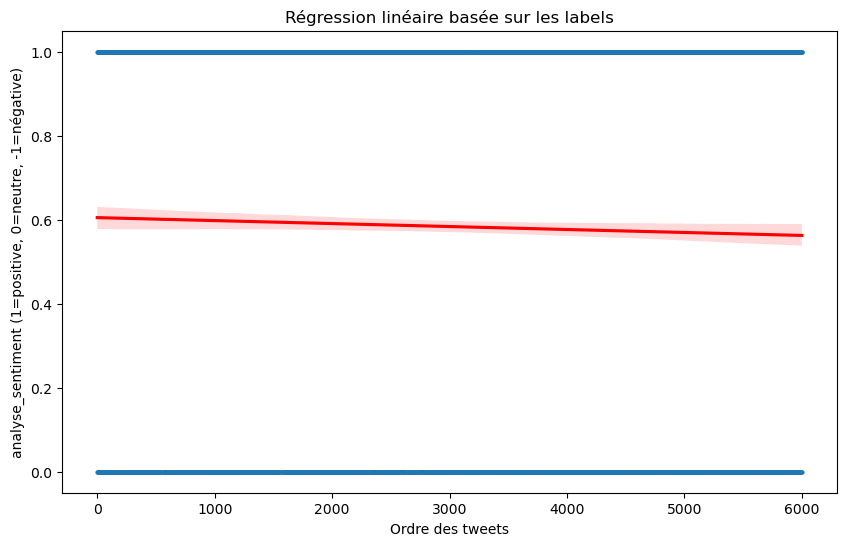

In [14]:
label_mapping = {'positive': 1, 'neutre': 0, 'negative': -1}
df['numeric_label'] = df['analyse_sentiment'].map(label_mapping)
 
plt.figure(figsize=(10, 6))
 
sns.regplot(x=df.index, y=df['numeric_label'], scatter_kws={'s': 5}, line_kws={'color': 'red'})
 
plt.title('Régression linéaire basée sur les labels')
plt.xlabel('Ordre des tweets')
plt.ylabel('analyse_sentiment (1=positive, 0=neutre, -1=négative)')
plt.show()
 